In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install pyarrow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 23.1 MB/s eta 0:00:0000:0100:01


In [6]:
sales = pd.read_feather("Sales_data.ftr")

In [9]:
sales.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


## Cleaning the Data

In [11]:
sales.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [13]:
sales = sales.dropna(how = "all")

In [14]:
sales.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [16]:
sales[sales.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [18]:
sales = sales.drop_duplicates()

In [19]:
sales[sales.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


## Finding the best month in sales

In [21]:
sales['Order Date'][0]

'04/19/19 08:46'

In [28]:
sales['Order Date'][0].split('/')[0]

'04'

In [25]:
'04/19/19 08:46'.split('/')[0]

'04'

In [29]:
def return_month(x):
    return x.split('/')[0]

In [32]:
sales.loc[:, 'Month'] = sales['Order Date'].apply(return_month)


In [33]:
sales.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [35]:
sales['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [61]:
sales = sales[sales['Month'] != 'Order Date']
sales['Month'] = sales['Month'].astype(int)


In [62]:
sales.dtypes

Order ID            object
Product             object
Quantity Ordered     int64
Price Each           int64
Purchase Address    object
Month                int64
dtype: object

In [65]:
sales['Quantity Ordered'] = sales['Quantity Ordered'].astype(int)
sales['Price Each'] = sales['Price Each'].astype(float)


In [66]:
sales.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Purchase Address     object
Month                 int64
dtype: object

In [72]:
sales['Total Sales'] = sales['Quantity Ordered'] * sales['Price Each']

In [74]:
sales.groupby(['Month'])['Total Sales'].sum()

Month
1     1813120.0
2     2189767.0
3     2791960.0
4     3373517.0
5     3136309.0
6     2564680.0
7     2634145.0
8     2230826.0
9     2084353.0
10    3717286.0
11    3182691.0
12    4586708.0
Name: Total Sales, dtype: float64

<Axes: xlabel='Month'>

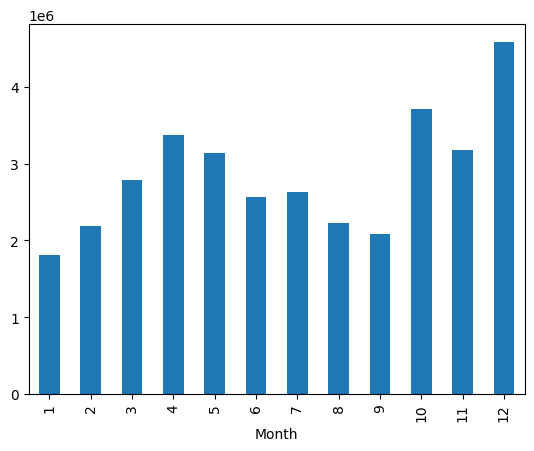

In [75]:
sales.groupby(['Month'])['Total Sales'].sum().plot(kind = 'bar')

## Which city has the most orders?

### Extracting City from 'Purchase Address'

In [76]:
sales['Purchase Address']

0                    917 1st St, Dallas, TX 75001
2               682 Chestnut St, Boston, MA 02215
3            669 Spruce St, Los Angeles, CA 90001
4            669 Spruce St, Los Angeles, CA 90001
5               333 8th St, Los Angeles, CA 90001
                           ...                   
186845     840 Highland St, Los Angeles, CA 90001
186846    216 Dogwood St, San Francisco, CA 94016
186847       220 12th St, San Francisco, CA 94016
186848     511 Forest St, San Francisco, CA 94016
186849     250 Meadow St, San Francisco, CA 94016
Name: Purchase Address, Length: 185686, dtype: object

In [79]:
sales['Purchase Address'][0].split(',')[1]

' Dallas'

In [83]:
sales['Purchase Address'].str.split(',').str.get(1)

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: Purchase Address, Length: 185686, dtype: object

In [85]:
sales['City'] = sales['Purchase Address'].str.split(',').str.get(1)

In [86]:
sales['City']

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: City, Length: 185686, dtype: object

In [87]:
pd.value_counts(sales['City'])

City
 San Francisco    44662
 Los Angeles      29564
 New York City    24847
 Boston           19901
 Atlanta          14863
 Dallas           14797
 Seattle          14713
 Portland         12449
 Austin            9890
Name: count, dtype: int64

<Axes: ylabel='count'>

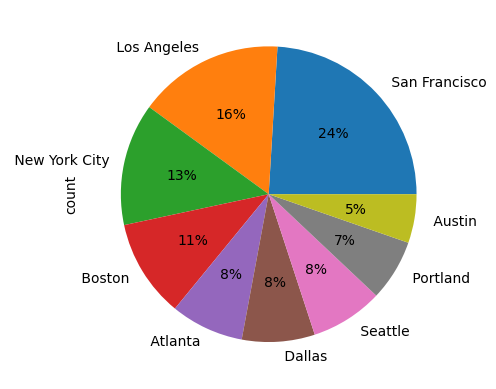

In [90]:
pd.value_counts(sales['City']).plot(kind = 'pie', autopct = '%1.0f%%')

## What product sold the most and why

In [111]:
count_df = sales.groupby(['Product']).agg({'Quantity Ordered': 'sum', 'Price Each': 'mean'})

In [112]:
count_df

,Quantity Ordered,Price Each
Product,,
20in Monitor,4126,109.0
27in 4K Gaming Monitor,6239,389.0
27in FHD Monitor,7541,149.0
34in Ultrawide Monitor,6192,379.0
AA Batteries (4-pack),27615,3.0
AAA Batteries (4-pack),30986,2.0
Apple Airpods Headphones,15637,150.0
Bose SoundSport Headphones,13430,99.0
Flatscreen TV,4813,300.0


In [113]:
count_df = count_df.reset_index()

In [115]:
count_df

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126,109.0
1,27in 4K Gaming Monitor,6239,389.0
2,27in FHD Monitor,7541,149.0
3,34in Ultrawide Monitor,6192,379.0
4,AA Batteries (4-pack),27615,3.0
5,AAA Batteries (4-pack),30986,2.0
6,Apple Airpods Headphones,15637,150.0
7,Bose SoundSport Headphones,13430,99.0
8,Flatscreen TV,4813,300.0
9,Google Phone,5529,600.0


In [124]:
products = count_df['Product'].values

In [127]:
products

array(['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       '34in Ultrawide Monitor', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone',
       'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable',
       'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable',
       'Vareebadd Phone', 'Wired Headphones', 'iPhone'], dtype=object)

Text(0, 0.5, 'Avg Price of Product')

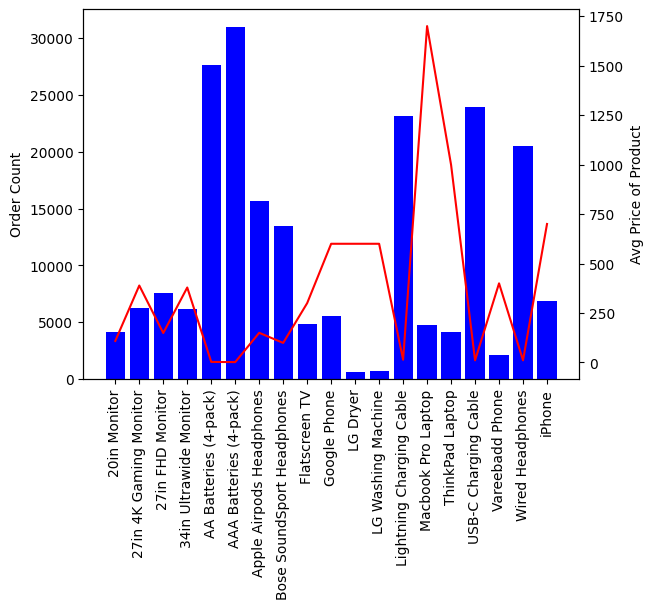

In [130]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(count_df['Product'], count_df['Quantity Ordered'], color = "blue")
ax2.plot(count_df['Product'], count_df['Price Each'], color = 'red')

ax1.set_xticklabels(products, rotation = 'vertical', fontsize = 10);

ax1.set_ylabel('Order Count')
ax2.set_ylabel('Avg Price of Product')


### The cheaper the average price, the higher the quantity ordered

In [132]:
sales['Product'].value_counts()

Product
USB-C Charging Cable          21859
Lightning Charging Cable      21610
AAA Batteries (4-pack)        20612
AA Batteries (4-pack)         20558
Wired Headphones              18849
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
27in FHD Monitor               7498
iPhone                         6840
27in 4K Gaming Monitor         6225
34in Ultrawide Monitor         6174
Google Phone                   5522
Flatscreen TV                  4794
Macbook Pro Laptop             4721
ThinkPad Laptop                4126
20in Monitor                   4098
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

In [140]:
most_sold_products = sales['Product'].value_counts().head(5).index

In [142]:
most_sold_products

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object', name='Product')

In [144]:
sales['Product'].isin(most_sold_products)

0          True
2         False
3         False
4          True
5          True
          ...  
186845     True
186846    False
186847    False
186848    False
186849     True
Name: Product, Length: 185686, dtype: bool

In [146]:
most_sold_products_df = sales[sales['Product'].isin(most_sold_products)]

In [147]:
most_sold_products_df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,sale,Total Sales,City
0,176558,USB-C Charging Cable,2,11.0,"917 1st St, Dallas, TX 75001",4,22.0,22.0,Dallas
4,176560,Wired Headphones,1,11.0,"669 Spruce St, Los Angeles, CA 90001",4,11.0,11.0,Los Angeles
5,176561,Wired Headphones,1,11.0,"333 8th St, Los Angeles, CA 90001",4,11.0,11.0,Los Angeles
6,176562,USB-C Charging Cable,1,11.0,"381 Wilson St, San Francisco, CA 94016",4,11.0,11.0,San Francisco
8,176564,USB-C Charging Cable,1,11.0,"790 Ridge St, Atlanta, GA 30301",4,11.0,11.0,Atlanta


In [150]:
pivot = pd.crosstab(most_sold_products_df['Month'], most_sold_products_df['Product'])

In [151]:
pivot

Product,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
Month,,,,,
1,1037,1084,1069,1171,1004
2,1274,1320,1393,1511,1179
3,1672,1645,1749,1766,1512
4,2062,1988,2197,2074,1888
5,1821,1888,1929,1879,1729
6,1540,1451,1560,1531,1334
7,1555,1554,1690,1667,1434
8,1357,1340,1354,1339,1191
9,1314,1281,1324,1451,1173


<Axes: xlabel='Month'>

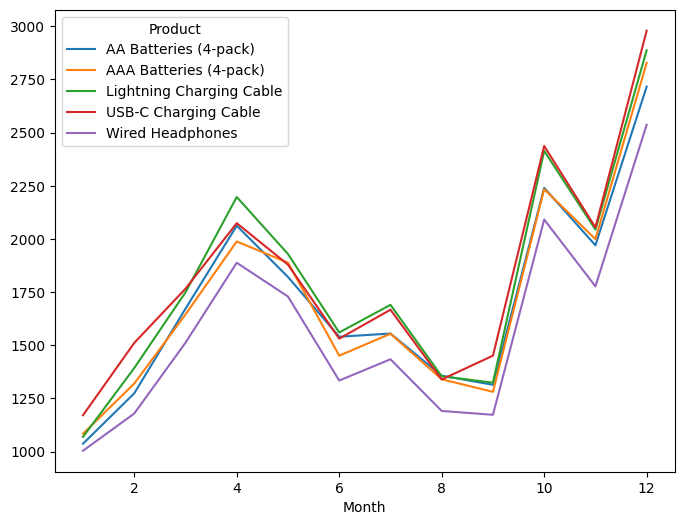

In [153]:
pivot.plot(figsize = (8,6))

## What products are most often sold together?

In [154]:
sales['Order ID']

0         176558
2         176559
3         176560
4         176560
5         176561
           ...  
186845    259353
186846    259354
186847    259355
186848    259356
186849    259357
Name: Order ID, Length: 185686, dtype: object

In [157]:
df_duplicated = sales[sales['Order ID']. duplicated (keep = False)]

In [158]:
df_duplicated

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,sale,Total Sales,City
3,176560,Google Phone,1,600.0,"669 Spruce St, Los Angeles, CA 90001",4,600.0,600.0,Los Angeles
4,176560,Wired Headphones,1,11.0,"669 Spruce St, Los Angeles, CA 90001",4,11.0,11.0,Los Angeles
18,176574,Google Phone,1,600.0,"20 Hill St, Los Angeles, CA 90001",4,600.0,600.0,Los Angeles
19,176574,USB-C Charging Cable,1,11.0,"20 Hill St, Los Angeles, CA 90001",4,11.0,11.0,Los Angeles
32,176586,AAA Batteries (4-pack),2,2.0,"365 Center St, San Francisco, CA 94016",4,4.0,4.0,San Francisco
...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.0,"106 7th St, Atlanta, GA 30301",9,3.0,3.0,Atlanta
186803,259314,Wired Headphones,1,11.0,"241 Highland St, Atlanta, GA 30301",9,11.0,11.0,Atlanta
186804,259314,AAA Batteries (4-pack),2,2.0,"241 Highland St, Atlanta, GA 30301",9,4.0,4.0,Atlanta
186841,259350,Google Phone,1,600.0,"519 Maple St, San Francisco, CA 94016",9,600.0,600.0,San Francisco


In [159]:
df_duplicated.groupby(['Order ID'])['Product'].apply(lambda x: ','.join(x))

Order ID
141275              USB-C Charging Cable,Wired Headphones
141290     Apple Airpods Headphones,AA Batteries (4-pack)
141365                   Vareebadd Phone,Wired Headphones
141384                  Google Phone,USB-C Charging Cable
141450            Google Phone,Bose SoundSport Headphones
                               ...                       
319536                Macbook Pro Laptop,Wired Headphones
319556                      Google Phone,Wired Headphones
319584                            iPhone,Wired Headphones
319596                    iPhone,Lightning Charging Cable
319631    34in Ultrawide Monitor,Lightning Charging Cable
Name: Product, Length: 6879, dtype: object

In [160]:
dup_products = df_duplicated.groupby(['Order ID'])['Product'].apply(lambda x : ','.join(x)).reset_index().rename(columns={'Product':'grouped_products'})


In [161]:
dup_products

,Order ID,grouped_products
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


In [164]:
dup_products_df = df_duplicated.merge(dup_products, how = 'left', on = 'Order ID')

In [165]:
dup_products_df

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,sale,Total Sales,City,grouped_products
0,176560,Google Phone,1,600.0,"669 Spruce St, Los Angeles, CA 90001",4,600.0,600.0,Los Angeles,"Google Phone,Wired Headphones"
1,176560,Wired Headphones,1,11.0,"669 Spruce St, Los Angeles, CA 90001",4,11.0,11.0,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.0,"20 Hill St, Los Angeles, CA 90001",4,600.0,600.0,Los Angeles,"Google Phone,USB-C Charging Cable"
3,176574,USB-C Charging Cable,1,11.0,"20 Hill St, Los Angeles, CA 90001",4,11.0,11.0,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.0,"365 Center St, San Francisco, CA 94016",4,4.0,4.0,San Francisco,"AAA Batteries (4-pack),Google Phone"
...,...,...,...,...,...,...,...,...,...,...
14123,259303,AA Batteries (4-pack),1,3.0,"106 7th St, Atlanta, GA 30301",9,3.0,3.0,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.0,"241 Highland St, Atlanta, GA 30301",9,11.0,11.0,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14125,259314,AAA Batteries (4-pack),2,2.0,"241 Highland St, Atlanta, GA 30301",9,4.0,4.0,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14126,259350,Google Phone,1,600.0,"519 Maple St, San Francisco, CA 94016",9,600.0,600.0,San Francisco,"Google Phone,USB-C Charging Cable"


In [169]:
no_dup_df = dup_products_df.drop_duplicates(subset = ['Order ID'])

In [172]:
no_dup_df.shape

(6879, 10)

In [174]:
no_dup_df['grouped_products'].value_counts()

grouped_products
iPhone,Lightning Charging Cable                     886
Google Phone,USB-C Charging Cable                   857
iPhone,Wired Headphones                             361
Vareebadd Phone,USB-C Charging Cable                312
Google Phone,Wired Headphones                       303
                                                   ... 
34in Ultrawide Monitor,20in Monitor                   1
Google Phone,Wired Headphones,Macbook Pro Laptop      1
LG Dryer,Vareebadd Phone                              1
20in Monitor,34in Ultrawide Monitor                   1
LG Washing Machine,AA Batteries (4-pack)              1
Name: count, Length: 350, dtype: int64

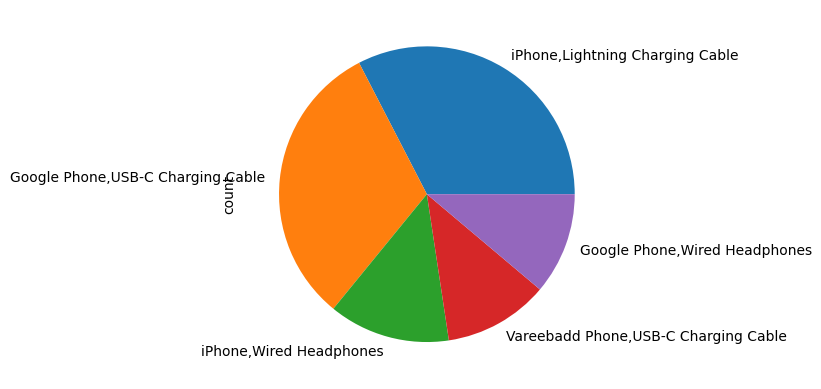

In [179]:
no_dup_df['grouped_products'].value_counts().head(5).plot.pie();